In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as P
from scipy.stats import skew

In [326]:
file_path = 'C:\\Users\\STEFANOS\\Desktop\\realtor-data.csv'

In [327]:
#Reading the csv file
df = pd.read_csv(file_path)

In [328]:
df.head(10)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,for_sale,179000.0,4.0,3.0,0.46,"Bo Calabazas San Sebastian, San Sebastian, PR,...",Bo Calabazas San Sebastian,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,for_sale,50000.0,3.0,1.0,0.20,"49.1 140, Ciales, PR, 00639",49.1 140,Ciales,Puerto Rico,639.0,2040.0,NaN
7,for_sale,71600.0,3.0,2.0,0.08,"3467 St, Ponce, PR, 00731",3467 St,Ponce,Puerto Rico,731.0,1050.0,NaN
8,for_sale,100000.0,2.0,1.0,0.09,"230 Rio De Vida, Ponce, PR, 00730",230 Rio De Vida,Ponce,Puerto Rico,730.0,1092.0,NaN
9,for_sale,300000.0,5.0,3.0,7.46,"Pr 120 Bo Maravilla Sur K M # 335, Las Marias,...",Pr 120 Bo Maravilla Sur K M # 335,Las Marias,Puerto Rico,670.0,5403.0,NaN


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        733159 non-null  object 
 1   price         733088 non-null  float64
 2   bed           617177 non-null  float64
 3   bath          621407 non-null  float64
 4   acre_lot      572378 non-null  float64
 5   full_address  733159 non-null  object 
 6   street        732069 non-null  object 
 7   city          733087 non-null  object 
 8   state         733159 non-null  object 
 9   zip_code      732957 non-null  float64
 10  house_size    520772 non-null  float64
 11  sold_date     347237 non-null  object 
dtypes: float64(6), object(6)
memory usage: 67.1+ MB


In [330]:
columns_with_na = df.isna().sum()
columns_with_na 

status               0
price               71
bed             115982
bath            111752
acre_lot        160781
full_address         0
street            1090
city                72
state                0
zip_code           202
house_size      212387
sold_date       385922
dtype: int64

In [331]:
#Dropping na values from specific columns
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df.shape

In [ ]:
duplicate_rows = df.duplicated()
df.duplicated().sum()

In [332]:
#table of duplicate rows
df.loc[duplicate_rows==True]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
3380,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
5083,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
5387,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
9053,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
10722,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...
733136,for_sale,350000.0,2.0,2.0,0.01,"327 Pond Ln, Piscataway, NJ, 08854",327 Pond Ln,Piscataway,New Jersey,8854.0,1551.0,2013-09-10
733145,for_sale,927500.0,5.0,4.0,1.50,"29 Wolf Hill Dr, Warren Twp, NJ, 07059",29 Wolf Hill Dr,Warren Twp,New Jersey,7059.0,3500.0,2006-04-07
733146,for_sale,241000.0,2.0,2.0,0.50,"510 N Oaks Blvd, North Brunswick, NJ, 08902",510 N Oaks Blvd,North Brunswick,New Jersey,8902.0,1077.0,2016-09-23
733147,for_sale,629000.0,5.0,2.0,0.06,"17 Delafield St, New Brunswick, NJ, 08901",17 Delafield St,New Brunswick,New Jersey,8901.0,2084.0,2007-05-30


#### Dropping duplicates, keeping the first row

In [333]:
df=df.drop_duplicates()

#### keeping dates from 2000-2020

In [337]:
df['year']=df['sold_date'].str.split('-').str[0].astype(int)
df=df[(df['year']>=2000) & (df['year']<=2020)]

In [335]:
df.shape

(21504, 13)

In [338]:
# Num of records per state
df['state'].value_counts()

state
New Jersey        6148
Connecticut       4546
Pennsylvania      3420
New York          2729
Massachusetts     1861
Rhode Island       973
New Hampshire      601
Delaware           516
Vermont            390
Maine              317
Virgin Islands       2
Puerto Rico          1
Name: count, dtype: int64

#### Keeping only the rows with more than 100 records per state

In [477]:
records_per_state=df['state'].value_counts()
df = df[df['state'].isin(records_per_state[records_per_state > 100].index)]
unique_states=df['state'].unique()
unique_states

array(['Massachusetts', 'Connecticut', 'New Hampshire', 'Vermont',
       'New York', 'Rhode Island', 'Maine', 'New Jersey', 'Pennsylvania',
       'Delaware'], dtype=object)

In [341]:
records_per_state.reset_index(name='records')

,state,records
0,New Jersey,6148
1,Connecticut,4546
2,Pennsylvania,3420
3,New York,2729
4,Massachusetts,1861
5,Rhode Island,973
6,New Hampshire,601
7,Delaware,516
8,Vermont,390
9,Maine,317


### Boxplots for price and house size (sq feet) for the initial df

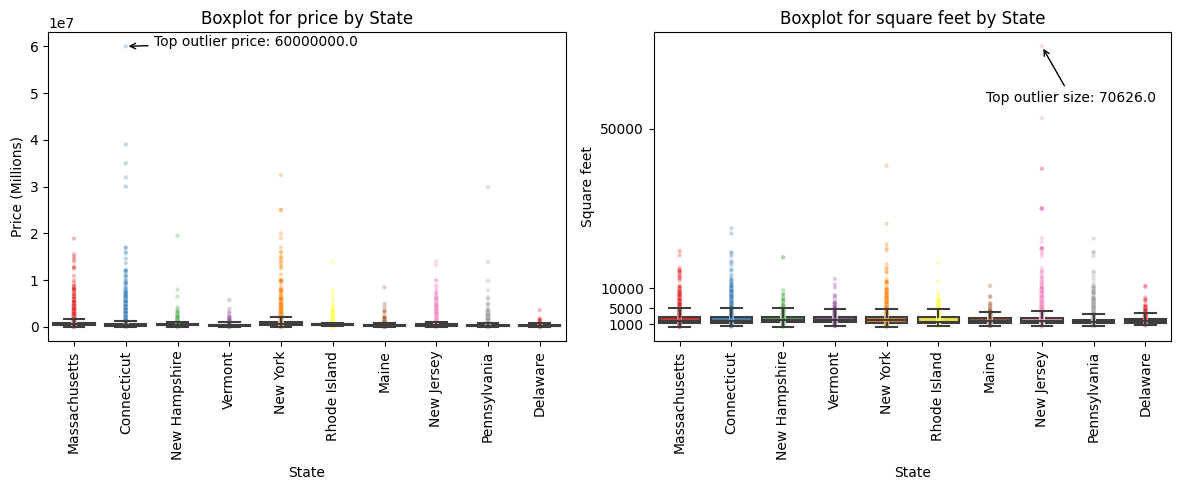

In [342]:
states = df['state'].unique()
#data
data1 = [df[df['state'] == state]['price'].values for state in states]
data2 = [df[df['state'] == state]['house_size'].values for state in states]
max_value_price = df['price'].max()
max_value_house_size = df['house_size'].max()

#visualizing
state_color_mapping = {state: sns.color_palette('Set1', len(states))[i] for i, state in enumerate(states)}
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))

#Boxplot for price 
sns.boxplot(data=data1, showfliers=False, palette=state_color_mapping.values(),ax=ax1)
sns.scatterplot(x='state', y='price', data=df, hue='state', palette=state_color_mapping, s=10, alpha=0.3,legend=False,ax=ax1)
ax1.annotate(f'Top outlier price: {max_value_price}', [df[df['price'] == max_value_price]['state'], max_value_price], xytext=(20, 0), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
ax1.set_xticks(range(0, len(states)),states,rotation='vertical')
ax1.set_xlabel("State")
ax1.set_ylabel("Price (Millions)")
ax1.set_title("Boxplot for price by State")

#Boxplot for house_sizes
sns.boxplot(data=data2, showfliers=False, palette=state_color_mapping.values(),ax=ax2)
sns.scatterplot(x='state', y='house_size', data=df, hue='state', palette=state_color_mapping.values(), s=10, alpha=0.3,legend=False,ax=ax2)

ax2.set_xticks(range(0, len(states)),states,rotation='vertical')
ax2.annotate(f'Top outlier size: {max_value_house_size}', [df[df['house_size'] == max_value_house_size]['state'], max_value_house_size], xytext=(-40, -40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
ax2.set_yticks([1000, 5000, 10000,50000])
ax2.set_xlabel("State")
ax2.set_ylabel("Square feet")
ax2.set_title("Boxplot for square feet by State")

plt.tight_layout()

plt.show()

### Creating a new filtered_df without outliers on price,house_size and beds

In [343]:
#Copying df to make a filtered version without outliers
filtered_df=df.copy()

In [344]:
#Limiting price,beds and house size values to remove outliers
whisker_state = filtered_df.groupby('state').apply(lambda x: 
pd.Series({'price_upper_whisker': x['price'].quantile(0.75) + 1.5* (x['price'].quantile(0.75) - x['price'].quantile(0.25)),
'price_lower_whisker': x['price'].quantile(0.01),          
'bedrooms_upper_whisker': x['bed'].quantile(0.75) + 1.5 * (x['bed'].quantile(0.75) - x['bed'].quantile(0.25)),
'house_size_upper_whisker': x['house_size'].quantile(0.75) + 1.5 * (x['house_size'].quantile(0.75) - x['house_size'].quantile(0.25))}))
#transform???
# Merge the upper whisker values back to the original DataFrame
filtered_df = filtered_df.merge(whisker_state,on='state')

# Filter rows where "price" is less than or equal to the corresponding "price_upper_whisker" value
# and beds are fewer than or equal to the corresponding "bedrooms_upper_whisker" value
# and "house size" is less than or equal to the corresponding "house_size_upper_whisker" value
filtered_df = filtered_df[(filtered_df['price'] <= filtered_df['price_upper_whisker']) & (filtered_df['price'] >= filtered_df['price_lower_whisker']) & 
(filtered_df['bed'] <= filtered_df['bedrooms_upper_whisker']) & (filtered_df['house_size'] <= filtered_df['house_size_upper_whisker'])]

In [478]:
filtered_df.shape

(18118, 17)

### Absolute difference on medians before and after filtering

In [345]:
#Median difference before and after filtering
median= df.groupby('state')['price'].median().reset_index(name='median')
median_filtered= filtered_df.groupby('state')['price'].median().reset_index(name='filtered_median')
before_after_median=median_filtered.merge(median,on='state',how='inner')
before_after_median['Difference']=(before_after_median['filtered_median']-before_after_median['median']).astype('int')
before_after_median

,state,filtered_median,median,Difference
0,Connecticut,345000.0,375000.0,-30000
1,Delaware,285000.0,300000.0,-15000
2,Maine,322950.0,347000.0,-24050
3,Massachusetts,549900.0,599000.0,-49100
4,New Hampshire,409900.0,429000.0,-19100
5,New Jersey,366000.0,396451.5,-30451
6,New York,685000.0,729900.0,-44900
7,Pennsylvania,289000.0,300000.0,-11000
8,Rhode Island,359900.0,389000.0,-29100
9,Vermont,291000.0,325000.0,-34000


### Heatmap on the max and median price of the filtered_df

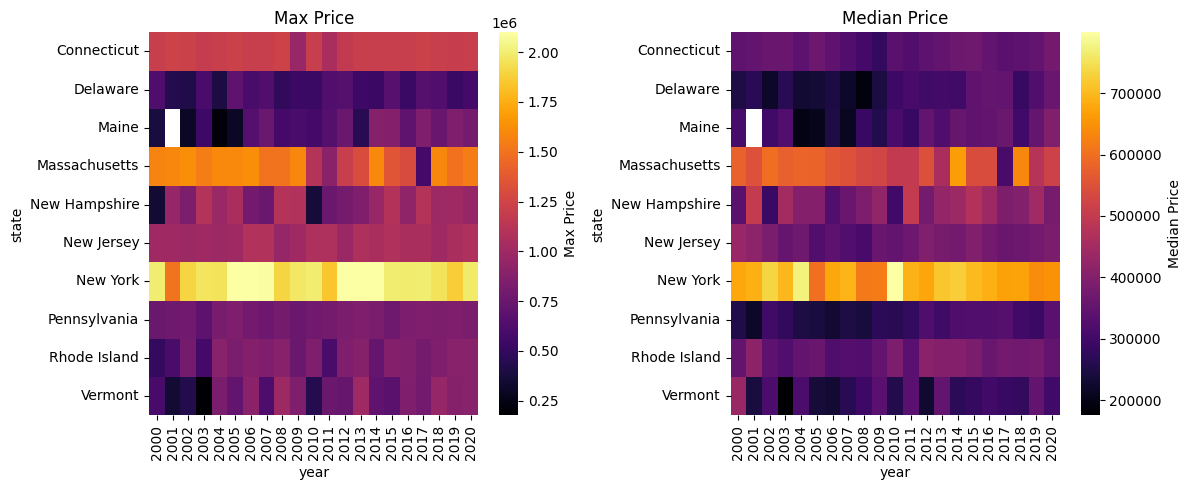

In [346]:
#Getting the data in pivoted form
pivot_data_max = filtered_df.pivot_table(index='state', columns='year', values='price',aggfunc='max')
pivot_data_median=filtered_df.pivot_table(index='state', columns='year', values='price',aggfunc='median')
#Heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(pivot_data_max, annot=False, cmap='inferno', cbar_kws={'label': 'Max Price'},ax=ax1)
sns.heatmap(pivot_data_min, annot=False, cmap='inferno', cbar_kws={'label': 'Median Price'},ax=ax2)
ax1.set_title('Max Price')
ax2.set_title('Median Price')
plt.tight_layout()
plt.show()

### Boxplots for price and house size (sq feet) for the filtered df

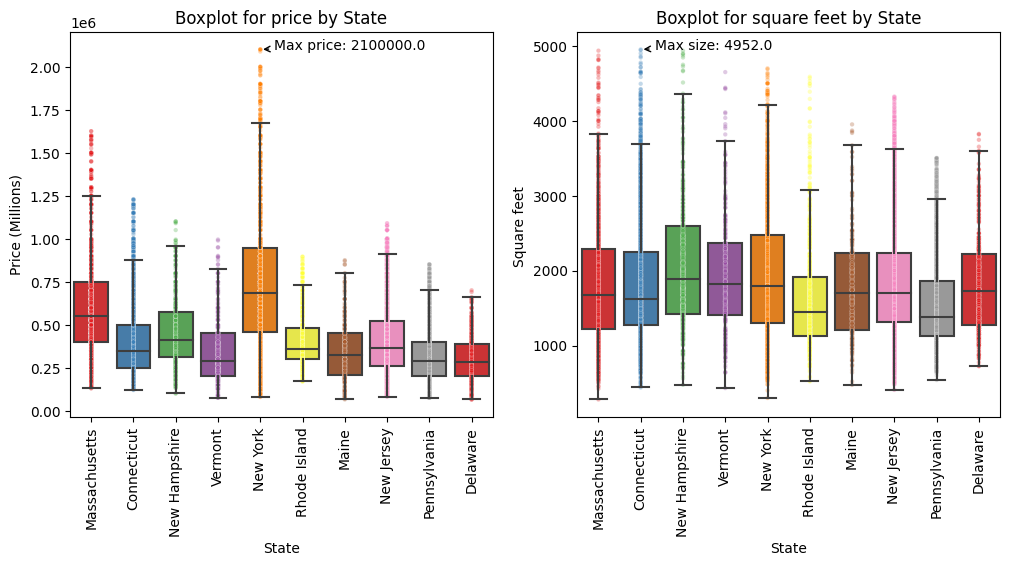

In [347]:
#Boxplot price for the filtered df

states = df['state'].unique()
data1 = [filtered_df[filtered_df['state'] == state]['price'].values for state in states]
data2 = [filtered_df[filtered_df['state'] == state]['house_size'].values for state in states]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5),sharex=True)
max_price=filtered_df['price'].max()
max_size=filtered_df['house_size'].max()
state_color_mapping = {state: sns.color_palette('Set1', len(states))[i] for i, state in enumerate(states)}
#Boxplot price
sns.boxplot(data=data1, showfliers=False, palette=state_color_mapping.values(), ax=ax1)
sns.scatterplot(x='state', y='price', data=filtered_df, hue='state', palette=state_color_mapping, s=10, alpha=0.3,legend=False, ax=ax1)
ax1.set_xlabel("State")
ax1.set_xticks(range(0, len(states)),states,rotation='vertical')
ax1.set_ylabel("Price (Millions)")
ax1.set_title("Boxplot for price by State")
ax1.annotate(f'Max price: {max_price}', [filtered_df[filtered_df['price'] == max_price]['state'].values[0], max_price], xytext=(10, 0), textcoords='offset points',arrowprops=dict(arrowstyle='->'))

#Boxplot house_size
sns.boxplot(data=data2, showfliers=False, palette=state_color_mapping.values(), ax=ax2)
sns.scatterplot(x='state', y='house_size', data=filtered_df, hue='state', palette=state_color_mapping, s=10, alpha=0.3,legend=False, ax=ax2)
ax2.set_xticks(range(0, len(states)),states,rotation='vertical')
ax2.set_xlabel("State")
ax2.set_ylabel("Square feet ")
ax2.set_title("Boxplot for square feet by State")
ax2.annotate(f'Max size: {max_size}', [filtered_df[filtered_df['house_size'] == max_size]['state'].values[0], max_size], xytext=(10, 0), textcoords='offset points',arrowprops=dict(arrowstyle='->'))

plt.show()

### Price distribution before-after filtering for outliers

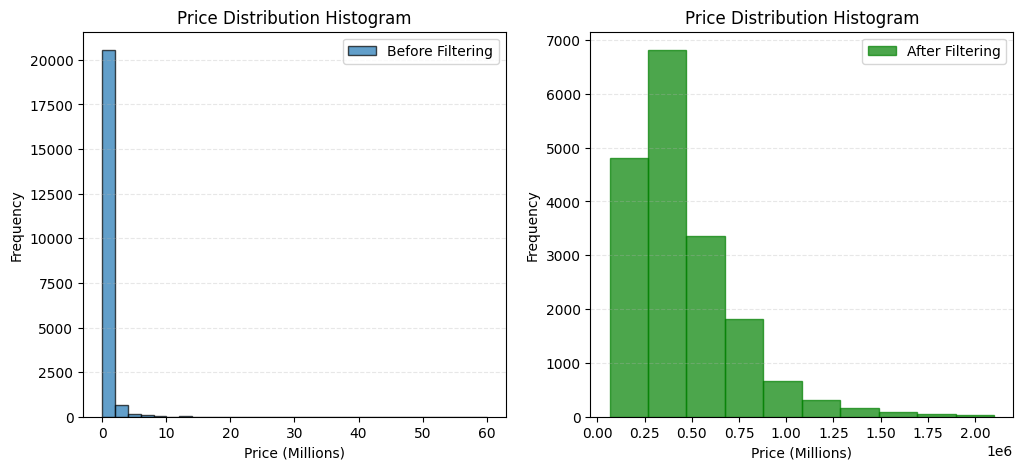

In [471]:
fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(12, 5))
df['price_millions']=df['price']/1_000_000
before_price_data = df['price_millions'].values
after_price_data = filtered_df['price'].values
#before (each bin is about 2M dollars in size)
ax1.hist(before_price_data, bins=30, edgecolor='k', alpha=0.7)
ax1.set_xlabel('Price (Millions)')
ax1.set_ylabel('Frequency')
ax1.set_title('Price Distribution Histogram')
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.legend(['Before Filtering'], loc='upper right')
#after
ax2.hist(after_price_data, bins=10, edgecolor='g',color='green' ,alpha=0.7)
ax2.set_xlabel('Price (Millions)')
ax2.set_ylabel('Frequency')
ax2.set_title('Price Distribution Histogram')
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.legend(['After Filtering'], loc='upper right')
plt.show()

### Price distribution with KDE plot before and after filtering for outliers focused on Pennsylvania

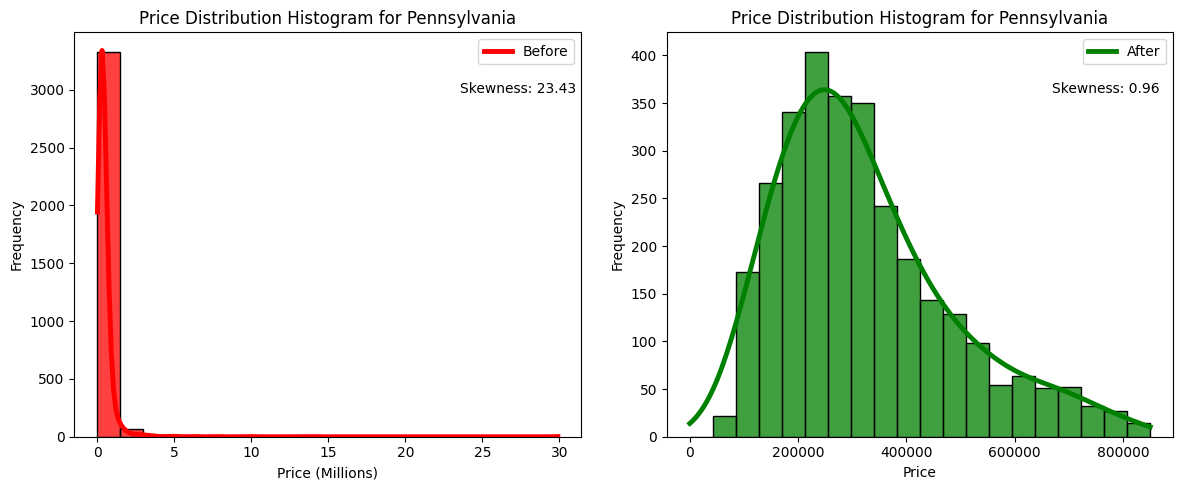

In [452]:
data_connecticut_before = df[df['state'] == 'Pennsylvania']['price'] / 1_000_000
data_connecticut_after = filtered_df[filtered_df['state'] == 'Pennsylvania']['price'] * 1
skewness=(skew(data_connecticut_before),skew(data_connecticut_after))
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
max_prices = [data_connecticut_before.max(), data_connecticut_after.max()]
hist_ranges = [(0, max_price) for max_price in max_prices]
skewness=(skew(data_connecticut_before),skew(data_connecticut_after))
colours=('red','green')
for i, ax in enumerate(axs):
    # Create a histogram
    sns.histplot(data_connecticut_before if i == 0 else data_connecticut_after, bins=20, binrange=hist_ranges[i], ax=ax,edgecolor='k',color=colours[i])
    
    # Create a KDE plot
    sns.kdeplot(data_connecticut_before if i == 0 else data_connecticut_after, linestyle='-', linewidth=3.5,color=colours[i], bw_method=0.35, clip=hist_ranges[i], ax=ax)
    
    # Calculate the KDE values
    kde_values = np.array(ax.lines[0].get_ydata())
    
    # Scale the KDE values to match the histogram frequencies
    hist_heights, _ = np.histogram(data_connecticut_before if i == 0 else data_connecticut_after, bins=20)
    scaling_factor = max(hist_heights) / max(kde_values)
    scaled_kde_values = kde_values * scaling_factor
    
    # Update the KDE line with the scaled values
    ax.lines[0].set_ydata(scaled_kde_values)
    # Settings of the plots 
    _, x_max = ax.get_xlim()
    _, y_max = ax.get_ylim()
    ax.set_title('Price Distribution Histogram for Pennsylvania')
    ax.set_xlabel('Price (Millions)' if i==0 else 'Price')
    ax.set_ylabel('Frequency')
    ax.text( 0.75*x_max,0.85*y_max ,f'Skewness: {(round(skewness[0],2))}' if i==0 else f'Skewness: {round(skewness[1],2)}', fontsize=10, color='black')
    ax.legend(['Before' if i==0 else 'After'], loc='upper right')

plt.tight_layout()
plt.show()